#### Problem statement:- Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.
**Data Description:**
- ID --Unique ID
- Balance--Number of miles eligible for award travel
- Qual_mile--Number of miles counted as qualifying for Topflight status
- cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
- cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
- cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:
- 1 = under 5,000
- 2 = 5,000 - 10,000
- 3 = 10,001 - 25,000
- 4 = 25,001 - 50,000
- 5 = over 50,000
- Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
- Bonus_trans--Number of non-flight bonus transactions in the past 12 months
- Flight_miles_12mo--Number of flight miles in the past 12 months
- Flight_trans_12--Number of flight transactions in the past 12 months
- Days_since_enrolled--Number of days since enrolled in flier program
- Award--whether that person had award flight (free flight) or not

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import normalize, StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## 2. Importing dataset

In [2]:
airlines_data = pd.read_csv('EastWestAirlines.csv')
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## 3. Initial Data Analysis

In [3]:
airlines_data.shape

(3999, 12)

In [4]:
airlines_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [5]:
airlines_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
airlines2 = airlines_data.drop(['ID#'],axis=1)
airlines2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


## 4. Applying Clustering models
1. **Hierarchical Clustering**

In [8]:
airlines2_norm = pd.DataFrame(normalize(airlines2),columns=airlines2.columns)   # Using normalize function to airlines2 (heterogenous numerical data)
airlines2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


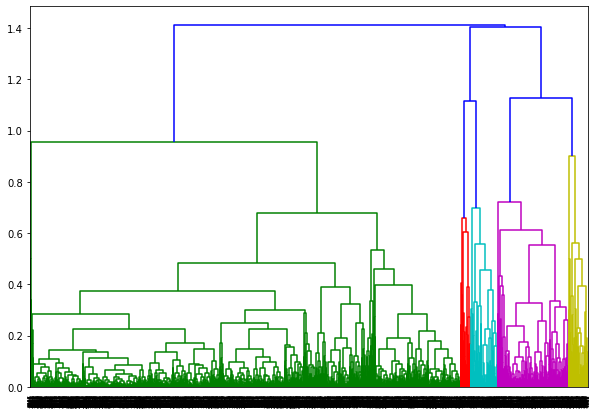

In [9]:
plt.figure(figsize=(10, 7))                      # Dendogram
dendograms = sch.dendrogram(sch.linkage(airlines2_norm,'complete'))
plt.show()

In [10]:
hclusters = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')     # Clusters (y)
hclusters

AgglomerativeClustering(n_clusters=5)

In [11]:
y = pd.DataFrame(hclusters.fit_predict(airlines2_norm),columns=['clustersid'])            
y['clustersid'].value_counts()

2    1547
4    1191
3     579
1     453
0     229
Name: clustersid, dtype: int64

In [12]:
airlines2['clustersid']=hclusters.labels_           # Adding clusters to dataset
airlines2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [13]:
airlines2.groupby('clustersid').agg(['mean']).reset_index()        # Group data by clusters 

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


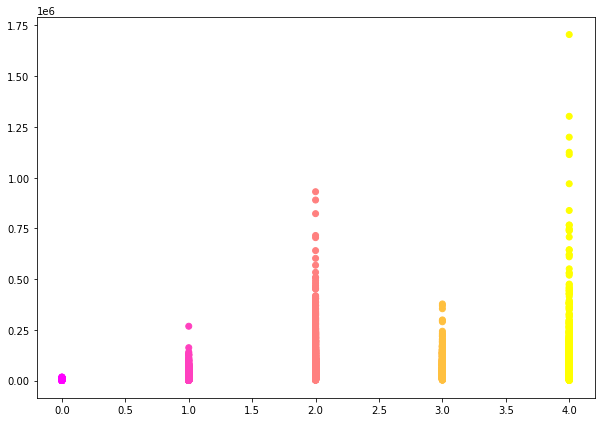

In [14]:
plt.figure(figsize=(10, 7))                  # Plot clusters
plt.scatter(airlines2['clustersid'],airlines2['Balance'], c=hclusters.labels_, cmap='spring')
plt.show()

2. **K-Means Clustering**

- Use Elbow Graph to find optimum number of  clusters (K value) from K values range
- The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
- random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change

 ***Within Cluster Sum-of-Squares criterion*** 

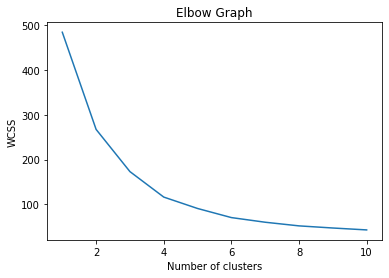

In [15]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(airlines2_norm)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)

plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

 #### Build Clustering model using K=4

In [16]:
clusters4 = KMeans(4,random_state=30).fit(airlines2_norm)           # K-Means clustering model (K=4)
clusters4

KMeans(n_clusters=4, random_state=30)

In [17]:
clusters4.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [18]:
airlines4 = airlines2.copy()
airlines4['clusters4id'] = clusters4.labels_                # Assigning clusters to dataset
airlines4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusters4id
0,28143,0,1,1,1,174,1,0,0,7000,0,4,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,0


In [19]:
clusters4.cluster_centers_       # Compute the centroids for K=4 clusters with 11 variables

array([[9.82878899e-01, 3.71612347e-03, 4.15057209e-05, 3.77179195e-05,
        3.76205578e-05, 8.06914054e-02, 1.57453088e-04, 6.65079627e-03,
        2.12921781e-05, 1.03324885e-01, 4.81770304e-06],
       [5.23653977e-01, 2.37603195e-03, 9.13653056e-05, 4.56081254e-05,
        4.45095230e-05, 7.97866700e-01, 5.07019477e-04, 1.75075997e-02,
        5.89123100e-05, 1.31443994e-01, 3.00837174e-05],
       [6.28081328e-01, 9.30359261e-04, 2.06331617e-04, 2.06128767e-04,
        2.05879951e-04, 1.23980626e-01, 4.76413717e-04, 6.66146530e-03,
        2.24385615e-05, 6.89106611e-01, 2.58980762e-05],
       [8.99048678e-01, 2.03403471e-03, 5.68074076e-05, 3.01913199e-05,
        2.95156437e-05, 4.03089039e-01, 4.02398112e-04, 7.62262675e-03,
        2.24052643e-05, 8.50654942e-02, 9.73901648e-06]])

In [20]:
airlines4.groupby('clusters4id').agg(['mean']).reset_index()        # Group data by Clusters (K=4)

,clusters4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,88484.857577,175.062961,1.495441,1.008250,1.001737,8110.131568,8.770734,476.973079,1.439427,4060.013895,0.255319,3.022145
1,1,28617.579670,112.000000,3.280220,1.030220,1.068681,42166.565934,17.634615,659.725275,1.909341,4229.689560,0.901099,1.016484
2,2,5129.247934,8.285124,1.004132,1.004132,1.000000,891.388430,3.012397,66.466942,0.194215,4843.239669,0.185950,0.128099
3,3,72378.903670,119.606422,3.077982,1.024771,1.018349,31486.477982,17.476147,445.017431,1.317431,4044.253211,0.477064,2.465138


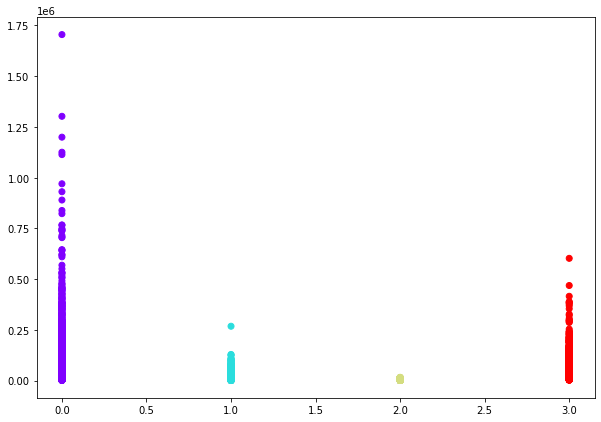

In [21]:
plt.figure(figsize=(10, 7))                  # Plot clusters
plt.scatter(airlines4['clusters4id'],airlines4['Balance'], c=clusters4.labels_, cmap= 'rainbow')
plt.show()

 #### Build Clustering model using K=5

In [22]:
clusters5 = KMeans(5,random_state=30).fit(airlines2_norm)          # K-Means clustering model (K=5)
clusters5

KMeans(n_clusters=5, random_state=30)

In [23]:
clusters5.labels_

array([0, 3, 0, ..., 4, 0, 3], dtype=int32)

In [24]:
airlines5 = airlines2.copy()                 # Adding clusters to dataset
airlines5['clusters5id'] = clusters5.labels_
airlines5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusters5id
0,28143,0,1,1,1,174,1,0,0,7000,0,4,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,4
3995,64385,0,1,1,1,981,5,0,0,1395,1,4,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,0


In [25]:
clusters5.cluster_centers_                   # Compute the centroids for K=5 clusters with 11 variables

array([[9.87581993e-01, 3.39051837e-03, 3.51053916e-05, 3.03791237e-05,
        3.02652033e-05, 9.01709733e-02, 1.53701634e-04, 6.66013521e-03,
        2.09767345e-05, 7.53291184e-02, 3.94536689e-06],
       [5.14758999e-01, 2.45703304e-03, 9.55752981e-05, 5.00781670e-05,
        4.87710513e-05, 8.02358706e-01, 5.20472068e-04, 1.80244812e-02,
        6.06430623e-05, 1.36539353e-01, 3.06234744e-05],
       [4.14644791e-01, 1.30104261e-18, 2.28611980e-04, 2.27627266e-04,
        2.27627266e-04, 1.50766683e-01, 5.97513433e-04, 7.35401490e-03,
        2.84888383e-05, 8.48268382e-01, 3.91049405e-05],
       [8.93103634e-01, 4.45303855e-03, 1.23796982e-04, 1.23612826e-04,
        1.23612826e-04, 7.60122618e-02, 2.95169039e-04, 6.30476783e-03,
        2.07480658e-05, 4.07515394e-01, 1.35161631e-05],
       [8.91833807e-01, 2.00098101e-03, 5.80553278e-05, 3.01489923e-05,
        2.94377607e-05, 4.20637046e-01, 4.04859493e-04, 7.68892416e-03,
        2.27011475e-05, 8.30834166e-02, 1.00407121e-

In [26]:
airlines5.groupby('clusters5id').agg(['mean']).reset_index()          # Group data by clusters (K=5)

,clusters5id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,97404.121382,185.499533,1.604575,1.009337,1.001867,9636.360411,9.704015,520.399627,1.565359,3960.816060,0.269374,3.081232
1,1,27526.798295,115.818182,3.247159,1.034091,1.071023,41812.809659,17.599432,676.107955,1.951705,4226.252841,0.903409,1.011364
2,2,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225,0.153153
3,3,11768.858247,55.121134,1.005155,1.000000,1.000000,984.778351,3.469072,93.216495,0.293814,4908.760309,0.172680,1.466495
4,4,70743.739563,116.122266,3.135189,1.025845,1.019881,32531.393638,17.626243,442.855865,1.312127,4045.261431,0.491054,2.491054


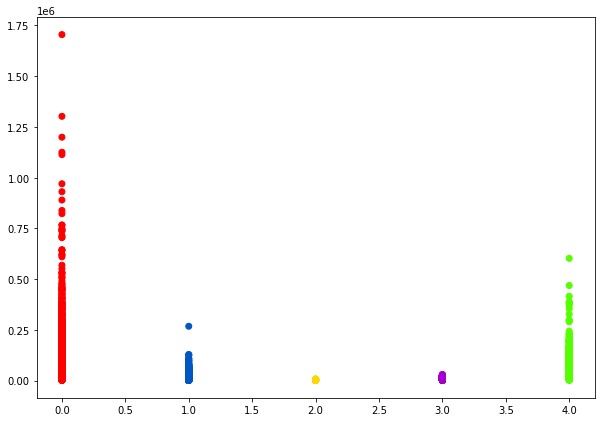

In [27]:
plt.figure(figsize=(10, 7))             # Plot clusters
plt.scatter(airlines5['clusters5id'],airlines5['Balance'], c=clusters5.labels_, cmap='prism')
plt.show()

3. **DBSCAN Clustering**

In [28]:
sc = StandardScaler()                        # Using StandardScaler to normalize airlines2
airlines3_norm = sc.fit_transform(airlines2)

In [29]:
clusters6 = DBSCAN(eps=1,min_samples=4)         # DBSCAN Clustering
clusters6.fit(airlines3_norm)

DBSCAN(eps=1, min_samples=4)

In [30]:
clusters6.labels_                               # Noisy samples are given the label -1.

array([0, 0, 0, ..., 1, 0, 0])

In [31]:
airlines6 = airlines2.copy()                 # Adding clusters to dataset
airlines6['clusters6id'] = clusters6.labels_
airlines6

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusters6id
0,28143,0,1,1,1,174,1,0,0,7000,0,4,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,4,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,0


In [32]:
airlines6.groupby('clusters6id').agg(['mean']).reset_index()        # Group data by clusters

,clusters6id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,171245.976510,895.447987,2.689597,1.058725,1.082215,38737.265101,21.870805,2144.045302,6.174497,4695.365772,0.689597,2.525168
1,0,53940.483029,3.030461,1.659269,1.000000,1.000000,8993.905570,8.422541,113.962576,0.373803,3802.094430,0.000000,2.653177
2,1,61618.534995,5.298178,2.618408,1.000000,1.000000,23046.414190,12.758389,217.765101,0.719080,4527.987536,1.000000,2.208054
3,2,157216.000000,83.333333,4.000000,1.000000,1.000000,35612.833333,18.666667,1580.166667,3.166667,6016.166667,1.000000,2.000000
4,3,202750.000000,0.000000,4.000000,1.000000,1.000000,43155.666667,20.333333,2456.666667,4.666667,4447.333333,0.000000,2.000000
5,4,58441.083333,0.000000,1.000000,1.000000,1.000000,11244.166667,11.833333,2281.500000,8.333333,3443.416667,1.000000,2.000000
6,5,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000,1.923077
7,6,33354.600000,0.000000,1.000000,3.000000,1.000000,14966.000000,14.200000,50.000000,0.200000,4205.000000,0.000000,2.800000
8,7,164883.400000,1471.600000,1.000000,1.000000,1.000000,8472.800000,5.000000,300.000000,1.400000,4173.400000,1.000000,4.000000


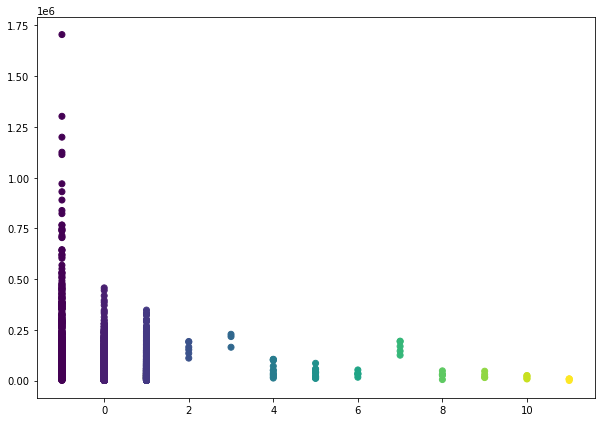

In [33]:
plt.figure(figsize=(10,7))                       # Plot clusters
plt.scatter(airlines6['clusters6id'],airlines6['Balance'],c=clusters6.labels_,cmap='viridis')
plt.show()

**---------------------------------------------------------------------------------------------------------------------------------------------------------**